<h1> Symbolic Computation and SymPy </h1>

Symbolic computation deals with the computation of mathematical objects symbolically. This means that the mathematical objects are represented exactly, not approximately, and mathematical expressions with unevaluated variables are left in symbolic form. In this part of the tutorial we will go over some of the basic functionality of the `SymPy` package, which does precisely this. Much of this section draws from:
```
https://docs.sympy.org/
```

There are a bunch of computer algebra software, including Maple and Mathematica. While the funcionality of SymPy is not as extensive as either of these, its benefits include that it is completely free and open source, uses Python as opposed to inventing its own language (Mathematica, for instance, uses the Wolfram langauge), and is fairly lightweight and easy to get started.

If you want to learn about Mathematica, stay tuned--PhySU will be offering a Mathematica workshop later into the school year!

<h2> Introduction to SymPy </h2>

Let us get started with SymPy. Say we want to compute square roots of some numbers. Native python libraries do this using floating point arithmetic, meaning that the results are approximate, not exact. With a symbolic computation system like SymPy, square roots of numbers that are not perfect squares are left unevaluated by default and reduced to a simplified form. Compare:

In [218]:
import numpy as np
from sympy import *

print(np.sqrt(3))
print(sympy.sqrt(3))

print(np.sqrt(8))
print(sympy.sqrt(8))
print(sympy.sqrt(8).evalf())

1.7320508075688772
sqrt(3)
2.8284271247461903
2*sqrt(2)
2.82842712474619


The above example starts to show how we can manipulate irrational numbers exactly using SymPy. But we can do much more! Symbolic computation systems (or computer algebra systems/ CASs) such as SymPy are capable of computing symbolic expressions with variables. In SymPy, variables are defined using `symbols`. Unlike many symbolic manipulation systems, variables in SymPy must be defined before they are used.

In [191]:
from sympy import symbols
x, y, z = symbols('x y z')
expr = x + 2*y
expr

x + 2*y

Note that we wrote $x + 2y$ just as we would if `x` and `y` were ordinary Python variables. But in this case, instead of evaluating to something, the expression remains as just `x + 2y`. Now, let's tinker with it.

In [195]:
expr + 1
# expr-x
# x*expr

x + 2*y + 1

Note that aside from obvious simplifications like $x-x$, most simplifications are not performed automatically. To go from various forms, we can use some of the below functions:

In [199]:
from sympy import expand, factor
expanded_expr = expand(x*expr)
expanded_expr
# factor(expanded_expr)

x**2 + 2*x*y

The real power of a symbolic computation system such as SymPy is the ability to do all sorts of computations symbolically. SymPy can simplify expressions, compute derivatives, integrals, and limits, solve equations, work with matrices, and more, all symbolically.

Here we make a note about equality. SymPy is like Python in that `=` does not represent equality; rather it is Python variable assignment. The `==` sign used for equality testing in Python doesn't represent equality in SymPy either--it represents exact structural equality testing. That is, `a==b` means we are asking if $a=b$. Instead, we use `Eq` to create symbolic equalities. Consider:

In [204]:
# x+1 == 4
#(x + 1)**2 == x**2 + 2*x + 1
#Eq(x + 1, 4)
#Eq(x**2 + x + 1, 4)

There is also a method called `equals` that tests if two expressions are equal by evaluating them numerically at random points.

In [205]:
a = cos(x)**2 - sin(x)**2
b = cos(2*x)
a.equals(b)

True

<h2> Basic Operations </h2>

Here we discuss some of the most basic operations needed for expression manipulation in SymPy.

One of the most common things you might want to do with a mathematical expression is substitution. Substitution replaces all instances of something in an expression with something else. It is done using the `subs` method. For example:

In [208]:
expr = cos(x) + 1
expr.subs(x, y)

cos(y) + 1

This can be used to evaluate an expression at a point. For example, consider:

In [209]:
expr.subs(x, 0)

2

Or to replace a subexpression with another subexpression:

In [212]:
expr = x**y
print(expr)
expr = expr.subs(y, x**y)
print(expr)
expr = expr.subs(y, x**x)
print(expr)

x**y
x**(x**y)
x**(x**(x**x))


In [214]:
expr = sin(2*x) + cos(2*x)
expr.subs(sin(2*x), 2*sin(x)*cos(x))

2*sin(x)*cos(x) + cos(2*x)

The latter example is an instance of a very controlled simplification, or perhaps a simplification that SymPy is otherwise unable to do. We will see however, that we can perform the above simplification with the function `expand_trig`.

It should be noted that `subs` returns a new expression. In fact, all SymPy objects are immutable and all functions return new expressions.

To perform multiple substitutions at once, pass a list of `(old, new)` pairs to `subs`:

In [222]:
expr = x**3 + 4*x*y - z
expr.subs([(x, 2), (y, 4), (z, 0)])

40

We can also convert strings to SymPy expressions using `sympify`:

In [223]:
str_expr = "x**2 + 3*x - 1/2"
expr = sympify(str_expr)
expr

x**2 + 3*x - 1/2

<h2> Simplification </h2>

One of the most useful features of a symbolic manipulation system is the ability to simplify mathematical expressions. SymPy has dozens of functions to perform various kinds of simplification. There is also one general function called `simplify()` that attempts to apply all of these functions in an intelligent way to arrive at the simplest form of an expression.

In [224]:
simplify(sin(x)**2 + cos(x)**2)

1

In [229]:
simplify((x**3 + x**2 - x - 1)/(x**2 + 2*x + 1))

x - 1

In [43]:
simplify(gamma(x)/gamma(x - 2))

(x - 2)*(x - 1)

One of the downsides of `simplify` is that it uses heuristics to determine the simplest result, which may not be what you want. Furthermore, it may be unnecessarily slow. For that reason, `simplify` is best used interactively when you want to get an expression down to a simpler form, and there are a wide range of other functions which you are encouraged to use instead:

In [230]:
expand((x + 1)**2)

x**2 + 2*x + 1

In [231]:
factor(x**3 - x**2 + x - 1)

(x - 1)*(x**2 + 1)

In [233]:
# the inputs to factor and expand need not be strict polynomials
factor(cos(x)**2 + 2*cos(x)*sin(x) + sin(x)**2)

(sin(x) + cos(x))**2

In [234]:
# cancel will take any rational function and put it into the standard canonical form
cancel((x**2 + 2*x + 1)/(x**2 + x))

(x + 1)/x

In [50]:
expr = (x*y**2 - 2*x*y*z + x*z**2 + y**2 - 2*y*z + z**2)/(x**2 - 1)
cancel(expr)

(y**2 - 2*y*z + z**2)/(x - 1)

In [236]:
# partial fractions:
expr = (4*x**3 + 21*x**2 + 10*x + 12)/(x**4 + 5*x**3 + 5*x**2 + 4*x)
expr.apart()

(2*x - 1)/(x**2 + x + 1) - 1/(x + 4) + 3/x

In [238]:
# simplify trigonometric functions:
trigsimp(sin(x)**4 - 2*cos(x)**2*sin(x)**2 + cos(x)**4)

cos(4*x)/2 + 1/2

In [53]:
trigsimp(cosh(x)**2 + sinh(x)**2)

cosh(2*x)

SymPy also supports a variety of special functions which can be found at https://docs.sympy.org/latest/modules/functions/index.html#functions-contents.
These include `factorial(n)`, `binomial(n,k)`, `gamma(z)`, `hyper([a,b],[c],z)`, and so on. Consider:

In [54]:
factorial(x).rewrite(gamma)

gamma(x + 1)

In [55]:
hyperexpand(hyper([1, 1], [2], z))

-log(1 - z)/z

In [56]:
gammasimp(gamma(x)*gamma(1 - x))

pi/sin(pi*x)

<h2> Calculus </h2>

Calculus forms the bread and butter of any university level physics course. Let's see how to tackle it using SymPy.

<h3> Differentiation </h3>

To take derivatives, we use `diff`. This can can also be used to take multiple derivatives at once, or even multiple derivatives of multiple variables.

In [239]:
diff(cos(x), x)

-sin(x)

In [242]:
diff(exp(x**2), x, 10)

8192*x*(4096*x**24 + 614400*x**22 + 38860800*x**20 + 1360128000*x**18 + 29072736000*x**16 + 395389209600*x**14 + 3459655584000*x**12 + 19275223968000*x**10 + 66258582390000*x**8 + 132517164780000*x**6 + 139143023019000*x**4 + 63246828645000*x**2 + 7905853580625)*exp(x**2)

In [243]:
expr = exp(x*y*z)
diff(expr, x, y, 2, z, 4)

x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

We can also create an unevaluated derivative using the `Derivative` class, which has the same syntax as `diff`. This is particularly useful for delaying the evaluation of the derivative, or for printing purposes. They are also used when SymPy does not know how to compute the derivative of an expression. To evaluate an unevaluated derivative, use `doit`.

In [246]:
deriv = Derivative(expr, x, y, y, z, 4)
print(deriv)
deriv.doit()

Derivative(exp(x*y*z), x, (y, 2), (z, 4))


x**3*y**2*(x**3*y**3*z**3 + 14*x**2*y**2*z**2 + 52*x*y*z + 48)*exp(x*y*z)

<h3> Integration </h3>

Next we consider integration using `integrate`. These can be definite or indefinite:

To compute an indefinite integral, that is, an antiderivative, or primitive, just pass the variable after the expression. Note that SymPy doesn't include the constant of integration.

In [247]:
integrate(cos(x), x)

sin(x)

To compute a definite integral, pass the argument `(integration_variable, lower_limit, upper_limit)`. For example:

In [248]:
integrate(exp(-x), (x, 0, oo))

1

Note that infinity is expressed in SymPy as `oo`. We can also do multiple integrals trivially:

In [251]:
integrate(exp(-x**2 - y**2), (x, -oo, oo), (y, -oo, oo))

pi

SymPy integration is quite powerful. `integrate` uses powerful algorithms including heuristic pattern matching algorithms, the Risch algorithm if you've heard of it, and an algorithm using Meijer G-functions that is useful for computing integrals in terms of special functions. Still, SymPy falls short of Mathematica. If `integrate` is unable to compute an integral, it returns an unevaluated Integral object.

In [252]:
expr = integrate(x**x, x)
print(expr)

Integral(x**x, x)


As with `Derivative`, you can create an unevaluated integral using `Integral`. To later evaluate this integral, call `doit`.

<h3> Limits </h3>

Limits are also easy to compute. However, expressions which evaluate to $\infty-\infty$ or $\frac{\infty}{\infty}$ may return `nan` (not a number).

In [253]:
limit(sin(x)/x, x, 0)

1

In [254]:
limit(x**2/exp(x), x, oo)

0

In [80]:
print(limit(1/x, x, 0, '+'))
print(limit(1/x, x, 0, '-'))

oo
-oo


<h3> Series Expansions </h3>

Lastly, SymPy is good at evaluating Taylor series expansions. To compute the expansion of $f(x)$ around the point $x=x0$ terms of order $x^n$, use `f(x).series(x, x0, n)`

In [258]:
expr = exp(sin(x))
expr.series(x, 0, 5)

1 + x + x**2/2 - x**4/8 + O(x**5)

In [259]:
exp(x-6).series(x, x0=6)

-5 + (x - 6)**2/2 + (x - 6)**3/6 + (x - 6)**4/24 + (x - 6)**5/120 + x + O((x - 6)**6, (x, 6))

<h2> Solving Equations </h2>

<h3> Algebraic Equations </h3>

Recall from above that symbolic equations in SymPy are represented by `Eq` instead of `=` or `==`. Alternatively, there is an even easier way. In SymPy, any expression not in an `Eq` is automatically assumed to equal 0 by the solving functions. Consider:

In [267]:
solveset(Eq(x**2, 1), x)

FiniteSet(-1, 1)

In [261]:
solveset(x**2 - 1, x)

FiniteSet(-1, 1)

As the above shows, the main function for solving algebraic equations is `solveset`. The syntax is given by `solveset(equation, variable=None, domain=S.Complexes)`, where equations may be in the form of `Eq` instances or expressions that are assumed to be equal to zero.

In [264]:
solveset(sin(x) - 1, x, domain=S.Reals)

ImageSet(Lambda(_n, 2*_n*pi + pi/2), Integers)

If there are no solutions, an `EmptySet` is returned.

We can also solve linear systems of equations, where the order of solutions corresponds to the order of given symbols. In the following we have infinitely many solutions, which SymPy has parameterized in terms of the variable $y$.

In [265]:
linsolve([x + y + z - 1, x + y + 2*z - 3], (x, y, z))

FiniteSet((-y - 1, y, 2))

SymPy also supports systems of nonlinear equations using `nonlinsolve`:

In [266]:
nonlinsolve([x**2 + 1, y**2 + 1], [x, y])

FiniteSet((I, I), (-I, I), (I, -I), (-I, -I))

<h3> Differential Equations </h3>

Lastly, we will show how SymPy can be used to solve differential equations using `dsolve`. First, we create an undefined function by passing `cls=Function` to the `symbols` function. This way, `f` and `g` are now undefined functions.

When we call `f(x)`, and it will represent an unknown function in terms of the variable `x`.

In [268]:
f, g = symbols('f g', cls=Function)

Now, consider the differential equation
$$f''(x) - 2f'(x) + f(x) = sin(x)$$
Where we note that all derivatives of `f(x)` are unevaluated.

In [269]:
diffeq = Eq( f(x).diff(x, x) - 2*f(x).diff(x) + f(x), sin(x) )
diffeq

Eq(f(x) - 2*Derivative(f(x), x) + Derivative(f(x), (x, 2)), sin(x))

Finally, we solve. Note that `dsolve` returns an instance of `Eq` (i.e. an equation or equality), since in general solutions to differential equations cannot be solved explicitly. Constants of integration are represented by `C`'s.

In [270]:
dsolve(diffeq, f(x))

Eq(f(x), (C1 + C2*x)*exp(x) + cos(x)/2)

<h2> Matrices </h2>

As a last demonstration of the functionality of SymPy, we show how it can be used with matrices.

To make a matrix in SymPy, use the Matrix object. A matrix is constructed by providing a list of row vectors that make up the matrix. For instance:

In [110]:
M = Matrix([[1, 2], [3, 2]])
M

Matrix([
[1, 2],
[3, 2]])

Manipulating them is straightforward:

In [111]:
M + 5*M + M**2

Matrix([
[13, 18],
[27, 22]])

In [114]:
# inverting a matrix
M**-1

Matrix([
[-1/2,  1/2],
[ 3/4, -1/4]])

In [115]:
# taking a transpose
M.T

Matrix([
[1, 3],
[2, 2]])

In [119]:
# matrix deterimant
M.det()

-4

We showcase some more complicated operations below.

In [272]:
M = Matrix([[1, 0, 1, 3], [2, 3, 4, 7], [-1, -3, -3, -4]])
M

Matrix([
[ 1,  0,  1,  3],
[ 2,  3,  4,  7],
[-1, -3, -3, -4]])

In [273]:
# row reduced echelon form (the second return is a tuple of the pivot columns)
M.rref()

(Matrix([
 [1, 0,   1,   3],
 [0, 1, 2/3, 1/3],
 [0, 0,   0,   0]]),
 (0, 1))

In [274]:
# return a list of column vectors that span the nullspace of the matrix.
M.nullspace()

[Matrix([
 [  -1],
 [-2/3],
 [   1],
 [   0]]),
 Matrix([
 [  -3],
 [-1/3],
 [   0],
 [   1]])]

In [275]:
M = Matrix([[3, -2,  4, -2], [5,  3, -3, -2], [5, -2,  2, -2], [5, -2, -3,  3]])
M

Matrix([
[3, -2,  4, -2],
[5,  3, -3, -2],
[5, -2,  2, -2],
[5, -2, -3,  3]])

In [276]:
# returns a dictionary of eigenvalues of the matrix of (eigenvalue, algebraic multiplicity) pairs
M.eigenvals()

{3: 1, -2: 1, 5: 2}

In [277]:
# diagonalize returns a tuple (P,D), where D is diagonal and M=PDP^-1
P, D = M.diagonalize()
P

Matrix([
[0, 1, 1,  0],
[1, 1, 1, -1],
[1, 1, 1,  0],
[1, 1, 0,  1]])

In [133]:
D

Matrix([
[-2, 0, 0, 0],
[ 0, 3, 0, 0],
[ 0, 0, 5, 0],
[ 0, 0, 0, 5]])

In addition to all the basic functionality of SymPy, there are packages built on top of this, many of which are specifically tailored towards physics applications of symbolic computation. For example, there are libraries that help compute Christoffel symbols/ connection coefficients, libraries that do Dirac algebra and perform Feynman integrals, etc.

<h1> Fourier Transforms and Signal Processing </h1>

Fourier transforms are an indespensible tool for physicists, widespread in the fields ranging from quantum mechanics to electrodynamics to optics and signal processing. Most commonly, it allow us to map a function from the time-domain to the frequency-domain, allowing us to visualize the sinusoidal signals which constitute a given curve.

Being so frequently used, we will introduce it here, along with basic elements of signal processing. Much of this section draws from https://docs.scipy.org/doc/scipy/reference/tutorial/fft.html.

Fourier analysis is a method for expressing a function as a sum of periodic components, and for recovering the signal from those components. Mathematically it is continuous, but when we compute it using a computer both the function and its Fourier transform are replaced with discretized counterparts, so the process is called the discrete Fourier transform (DFT). The DFT has become a mainstay of numerical computing in part because of a very fast algorithm for computing it, called the Fast Fourier Transform (FFT).

To do this, we will use the `fft` function from the `scipy.fft` subpackage.

In [278]:
from scipy.fft import fft

We will create some test data next of which we will take the fast Fourier transform. The data we create is a superposition of two sinusoids with distinct frequencies 50 and 80. Hence, when we transform this to Fourier (frequency) space, we should expect to get a graph with spikes at 50 and 80.

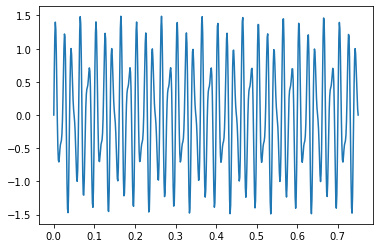

In [282]:
# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0

x = np.linspace(0.0, N*T, N)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)

plt.figure()
plt.plot(x,y)

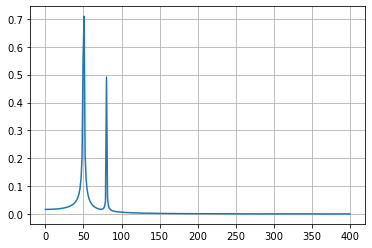

In [285]:
yf = fft(y)

# take N//2 to keep the positive frequency terms.
xf = np.linspace(0.0, 1.0/(2.0*T), N//2)

# multiply by normalization constants
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()
plt.show()

Note that these peaks are not 'infinitely' sharp (i.e. delta functions centered at the frequencies), although they theoretically should. This has to do with the discretization of the Fourier transform, which truncates the input signal.

Scipy also allows you to compute 2 dimensional (or higher) Fourier decompositions. For instance, consider:

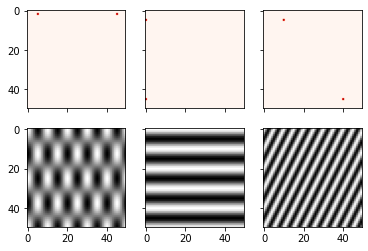

In [289]:
from scipy.fft import ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm

# create figures
f, ((ax1, ax2, ax3), (ax4, ax5, ax6)) = plt.subplots(2, 3, sharex='col', sharey='row')

# dimension of data
N = 50

# FIRST ROW
# create data to be reverse Fourier transformed
xf = np.zeros((N,N))
xf[2, 5] = 1
xf[2, N-5] = 1

# another instance of FFT from scipy, which uses complex exponentials instead of sines and cosines
Z = ifftn(xf)

ax1.imshow(xf, cmap=cm.Reds)
ax4.imshow(np.real(Z), cmap=cm.gray)


xf = np.zeros((N, N))
xf[5, 0] = 1
xf[N-5, 0] = 1
Z = ifftn(xf)
ax2.imshow(xf, cmap=cm.Reds)
ax5.imshow(np.real(Z), cmap=cm.gray)
xf = np.zeros((N, N))
xf[5, 10] = 1
xf[N-5, N-10] = 1
Z = ifftn(xf)
ax3.imshow(xf, cmap=cm.Reds)
ax6.imshow(np.real(Z), cmap=cm.gray)
plt.show()


<h1> Curve-Fitting </h1>

The next topic that we will discuss is curve-fitting, which some of you are likely familiar with. As such, I'll try to make it brief, while also discussing some nice plotting functions of `matplotlib`.

Much of this section draws from https://www.geeksforgeeks.org/scipy-curve-fitting/.

We begin by importing the necessary packages. In particular, we will be using the `curve_fit` function from `scipy.optimize`, and the `pyplot` subpackage from `matplotlib`.

In [290]:
import numpy as np
import scipy.optimize

# Import the curve-fit() function from scipy 
from scipy.optimize import curve_fit 

# Import the pyplot function from matplotlib
import matplotlib.pyplot as plt

Now, let us create some data. We do this by sampling a sinusoidal function, with random Gaussian noise.

[-0.78109702  1.65350368  2.60210474  2.91696409  3.29699128  2.79977106
  4.48247401  2.50335718  3.18674627  1.17035826  1.01037845  1.05633791
  0.59217036 -3.35453561 -2.80148884 -4.14487888 -4.07660716 -4.08948468
 -2.96140391 -4.33161818 -3.10474526 -1.04166338 -0.71665721 -2.46593011
  1.14247422  0.46376715  3.29163023  2.29642152  3.77757146  3.36957686
  1.45276155  3.81462005  3.21710413 -0.536759    0.82866006 -2.00005422
 -1.82322241 -2.08076091 -1.7515152  -3.49116179 -2.79387807 -3.88936821
 -2.64786621 -2.7137756  -1.96212903 -0.78109434  1.83231124  1.91291714
  1.14145053  3.47016138]


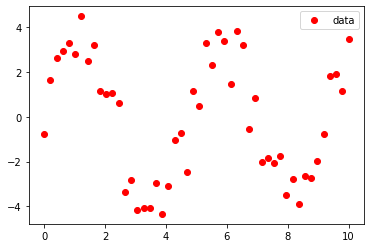

In [298]:
# Using numpy.linspace with the given arguments to produce an array of 40 numbers between 0 and 10, both inclusive 
x = np.linspace(0, 10, num = 50)

# y is another array which stores 3.45 times the sine of (values in x) * 1.334.  
# The random.normal() draws random sample from normal (Gaussian) distribution to make 
# them scatter across the base line 
y = 3.45 * np.sin(1.334 * x) + np.random.normal(size = 50) 

print(y)


# We can plot the function to see how it looks
plt.plot(x, y, 'o', color ='red', label ="data")   
plt.legend() 
plt.show()


To perform curve_fit on the given data, we must create a test function with coefficients as parameters. In the following example, our test function is sinusoidal, because we seek to fit a sinusoid to the above data.

In [315]:
def test(x, a, b):
    return a * np.sin(b*x)

Now we move onto the main function at hand, or `curve_fit()`. This function takes 3 arguments: the `test`-function, the x-data, and the y-data to be fitted. It returns two things. First, the coefficients `a` and `b` in `param` which correspond to the best-fit curve. The other return is the estimated covariance of `param` in `param_cov`.

The diagonal elements of `param_cov` correspond to the standard deviation squared, or the square of the estimated error in fitting `a` and `b` based on the noisiness of the data at hand. Loosely speaking, the off-diagonal elements tell you how much the fitting parameters are correlated. If you want to know more about them, take a statistics course.

In [316]:
params, param_cov = curve_fit(test, x, y) 
  
print("Sine funcion coefficients 'a' and 'b':")
print(params)

print("Covariance of coefficients:") 
print(param_cov)

Sine funcion coefficients 'a' and 'b':
[3.58981669 1.34874103]
Covariance of coefficients:
[[ 3.79825721e-02 -5.89009273e-05]
 [-5.89009273e-05  7.69127707e-05]]


We typically take the square root of the diagnal element of the covariance matrix to be the uncertainty of the coefficients.

In [317]:
print("The curve fit coefficents are", param[0], '\pm', np.sqrt(param_cov[0,0]), \
      'and \n', param[1], '\pm', np.sqrt(param_cov[1,1]))

The curve fit coefficents are 3.5898166850643385 \pm 0.19489118025041458 and 
 1.348741034598861 \pm 0.008769992630704227


Finally, we plot the best-fit curve with the data:

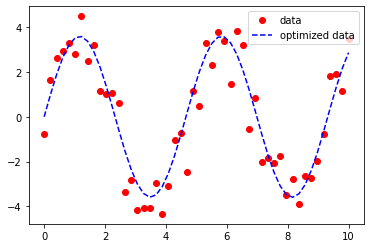

In [320]:
# ans stores the new y-data according to the coefficients given by curve-fit() function 
ans = (params[0] * (np.sin( params[1]*x )))

# Plot the optimized data with our original data
plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show()

Now, consider the same process where instead the original data has a given uncertainty. This will often happen in lab courses where the data you collect will have an inherent uncertainties. Here, assume we have a systematic uncertainty of 0.3 units.

Then we can perform curvefit again, noting that `curve_fit` does not take in the x-component uncertainty.

The curve fit coefficents are 3.5898166847026807 \pm 0.19489118041068795 and 
 1.3487410346045663 \pm 0.008769992623182418


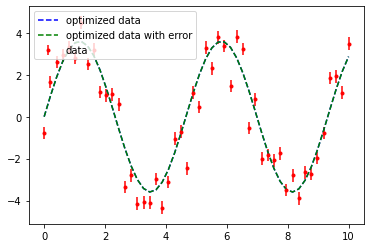

In [321]:
y_error = np.zeros(len(y))+0.3

param_u, param_cov_u = curve_fit(test, x, y, sigma=y_error)


# the below code for plotting is the exact same as the above

print("The curve fit coefficents are", param_u[0], '\pm', np.sqrt(param_cov_u[0,0]), \
      'and \n', param_u[1], '\pm', np.sqrt(param_cov_u[1,1]))

ans_u = (param_u[0]*(np.sin(param_u[1]*x)))

# Plot the optimized data with our original data with uncertainty bars
plt.errorbar(x, y, yerr=y_error, fmt='o',markersize=3, color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
plt.plot(x, ans_u, '--', color ='green', label ="optimized data with error") 
plt.legend()
plt.show()

Here you see that the best-fit curve with and without taking into account error practically overlap, but this isn't always the case.

Sometimes, the `curve_fit` function cannot figure out the coefficients because they are too big or too small. This is because `curve_fit` function finds the parameters of the test function using gradient descent to find values of the parameters that will minimize some error function between the best-fit curve and the data. However, it may find a local minimum in the parameter space which is not a global minimum. As such, the result returned by the `curve_fit` function will be wrong.

For example, consider:

The curve fit coefficents are 1.0344174541435092 \pm 0.7528916939085779 and 
 1.251270796022378 \pm 0.1227834218687726


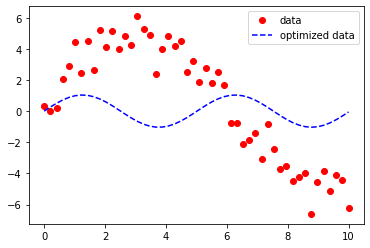

In [324]:
# Produce a function with small coefficents
y_big = 5.05 * np.sin(0.511 * x) + np.random.normal(size = 50) 

# Perform curve fit 
param_big, param_cov_big = curve_fit(test, x, y_big)

# plotting stuff, can ignore
print("The curve fit coefficents are", param_big[0], '\pm', np.sqrt(param_cov_big[0,0]), \
      'and \n', param_big[1], '\pm', np.sqrt(param_cov_big[1,1]))

ans_big = (param_big[0]*(np.sin(param_big[1]*x)))

# Plot the optimized data with our original data
plt.plot(x, y_big, 'o', color ='red', label ="data") 
plt.plot(x, ans_big, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 

In this case, it is necessary to feed the `curve_fit` function an initial guess. This is given by the `p0` argument. In the following case, based on the data we guess 5 and 0.5 to be the values of `a` and `b`, respectively. The resulting fit is much nicer.

The curve fit coefficents are 4.961948402540288 \pm 0.18034286450827194 and 
 0.5057512186411722 \pm 0.007422821263943923


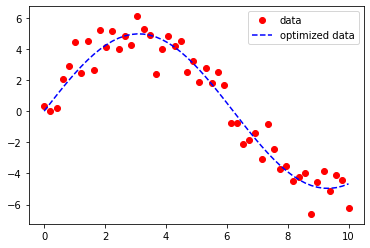

In [325]:
param_big_0, param_cov_big_0 = curve_fit(test, x, y_big, p0=[5, 0.5])

# plotting stuff, can ignore.

print("The curve fit coefficents are", param_big_0[0], '\pm', np.sqrt(param_cov_big_0[0,0]), \
      'and \n', param_big_0[1], '\pm', np.sqrt(param_cov_big_0[1,1]))

ans_big_0 = (param_big_0[0]*(np.sin(param_big_0[1]*x)))

# Plot the optimized data with our original data
plt.plot(x, y_big, 'o', color ='red', label ="data") 
plt.plot(x, ans_big_0, '--', color ='blue', label ="optimized data") 
plt.legend() 
plt.show() 